In [1]:
import os
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Projects\\E-Commerce Domain'

In [3]:
# Importing Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
dataset=pd.read_csv('E-com_Data.csv')

In [6]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [7]:
print(f'The dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns')

The dataset has 541116 rows and 12 columns


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [9]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [10]:
# Duplicate Data
dataset.duplicated().sum()

3145

# Data Preprocessing

In [11]:
# Missing Data
dataset.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [12]:
# Percentage of missing data
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [13]:
dataset=dataset.rename(columns = {'InvoieNo':'InvoiceNo','Date of purchase':'Date'})

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  float64
 3   Date               537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [15]:
dataset=dataset.drop_duplicates(ignore_index=True)

In [16]:
dataset.isnull().sum()

CustomerID           133790
Item Code                 1
InvoiceNo                 1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [17]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            24.869370
Item Code              0.000186
InvoiceNo              0.000186
Date                   0.000186
Quantity               0.000186
Time                   0.000186
price per Unit         0.000186
Price                  0.000186
Shipping Location      0.000186
Cancelled_status      98.448801
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [18]:
# Dropping the null customer IDs

dataset=dataset.dropna(subset=['CustomerID'])

In [19]:
dataset.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [20]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [21]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [22]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [23]:
# Creating another date column
dataset['Date1']=dataset['Date']

In [24]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [25]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [26]:
import datetime as dt

latest_date=dt.datetime(2017,12,20)

In [27]:
RFMScores=dataset.groupby('CustomerID').agg({'Date1':lambda x:(latest_date - x.max()).days,
                                            'Date':lambda x:x.count(),
                                            'Price':lambda x:x.sum()})
 
# Converting invoice date into int
RFMScores['Date'] = RFMScores['Date'].astype(int)
RFMScores.rename(columns = {'Date1' : "Recency", "Date": "Frequency","Price":"Monetary"},
               inplace = True)

RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
5,7.0,208,4,9410.0
6,8.0,234,58,135550.0
7,9.0,15,13,65832.0
8,10.0,16,58,331601.0
9,11.0,9,131,771439.0


In [28]:
RFMScores.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0


In [29]:
RFMScores.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

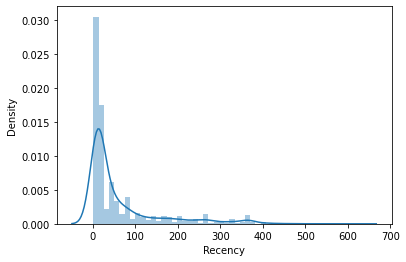

In [30]:
x = RFMScores['Recency']
ax = sns.distplot(x)

In [31]:
RFMScores.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

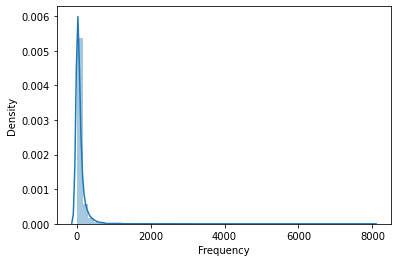

In [32]:
x = RFMScores['Frequency']
ax = sns.distplot(x)

In [33]:
RFMScores.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

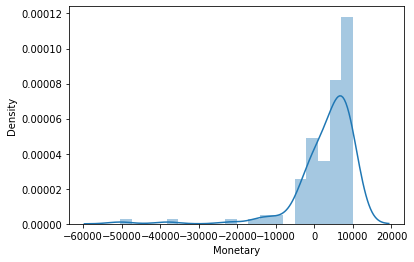

In [34]:
x=RFMScores.query('Monetary < 10000')['Monetary']
ax=sns.distplot(x)

In [35]:
# Splitting the data into 4 segments

quantiles=RFMScores.quantile(q=[0.25, 0.5, 0.75])
quantiles=quantiles.to_dict()

In [36]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0},
 'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0}}

In [37]:
# Functions to create Recency, Frequency and Monetary segment

def RScores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FScores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
# def MScores(x,p,d):
#     if x <= d[p][0.25]:
#         return 4
#     elif x <= d[p][0.50]:
#         return 3
#     elif x <= d[p][0.75]:
#         return 2
#     else:
#         return 1
        

In [38]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [39]:
RFMScores['R']=RFMScores['Recency'].apply(RScores, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FScores, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FScores, args=('Monetary',quantiles))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2


In [40]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)

In [41]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,4,3,1,431,8
4.0,20,72,176613.0,3,2,2,322,7
5.0,18,16,41976.0,2,4,3,243,9
6.0,9,84,151822.0,1,2,2,122,5


In [43]:
Loyalty_level = ['Platinum','Diamond','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q=5, labels=Loyalty_level)
RFMScores['RFM_Loyalty_level'] = Score_cuts.values
RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,2.0,4,182,553704.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Diamond
3,5.0,18,16,41976.0,2,4,3,243,9,Gold
4,6.0,9,84,151822.0,1,2,2,122,5,Diamond
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze
6,8.0,234,58,135550.0,4,2,2,422,8,Gold
7,9.0,15,13,65832.0,2,4,3,243,9,Gold
8,10.0,16,58,331601.0,2,2,1,221,5,Diamond
9,11.0,9,131,771439.0,1,1,1,111,3,Platinum


In [44]:
# Filter RFMGroup = 111 as they are the best customers
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,1704.0,3,2053,35536194.0,1,1,1,111,3,Platinum
1,1896.0,2,5874,17743855.0,1,1,1,111,3,Platinum
2,56.0,10,757,14357682.0,1,1,1,111,3,Platinum
3,1346.0,9,1395,12647317.0,1,1,1,111,3,Platinum
4,3802.0,3,1060,12319439.0,1,1,1,111,3,Platinum
5,4234.0,3,322,10654918.0,1,1,1,111,3,Platinum
6,1006.0,5,571,9351019.0,1,1,1,111,3,Platinum
7,3203.0,5,269,8102167.0,1,1,1,111,3,Platinum
8,2193.0,1,2489,7966054.0,1,1,1,111,3,Platinum
9,1448.0,5,1638,7892625.0,1,1,1,111,3,Platinum


In [45]:
# Handling negative and zero values in Recency, Frequency, and Monetary

'''def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Frequency'] = [handle_neg_n_zero(x) for x in RFMScores.Frequency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

new_data = RFMScores.iloc[:,0:3]
new_data.head()
'''

"def handle_neg_n_zero(num):\n    if num <= 0:\n        return 1\n    else:\n        return num\n\nRFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]\nRFMScores['Frequency'] = [handle_neg_n_zero(x) for x in RFMScores.Frequency]\nRFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]\n\nnew_data = RFMScores.iloc[:,0:3]\nnew_data.head()\n"

In [46]:
RFMScores = RFMScores.reset_index()

In [47]:
RFMScores1 = RFMScores.iloc[:,0:4]

In [48]:
RFMScores1.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
RFMScores_scaled=scaler.fit_transform(RFMScores1)
RFMScores_scaled = pd.DataFrame(RFMScores_scaled)
RFMScores_scaled

,0,1,2,3
0,-1.732277,-0.640796,0.383795,0.377719
1,-1.731485,0.173513,-0.284135,0.032043
2,-1.730692,-0.462317,-0.090220,-0.062211
3,-1.729899,-0.484627,-0.331537,-0.219285
4,-1.729106,-0.585021,-0.038510,-0.091133
...,...,...,...,...
4344,1.728958,-0.495782,-0.357392,-0.244363
4345,1.729751,1.333623,-0.370320,-0.255686
4346,1.730544,-0.551556,-0.344465,-0.239134
4347,1.731337,-0.640796,2.848672,0.059114


In [50]:
RFMScores_scaled.rename(columns = {0:'CustomerID',1:'Recency',2:'Frequency',3:'Monetary'}, inplace = True)
RFMScores_scaled.head()

,CustomerID,Recency,Frequency,Monetary
0,-1.732277,-0.640796,0.383795,0.377719
1,-1.731485,0.173513,-0.284135,0.032043
2,-1.730692,-0.462317,-0.090220,-0.062211
3,-1.729899,-0.484627,-0.331537,-0.219285
4,-1.729106,-0.585021,-0.038510,-0.091133


# K-Means Cluster

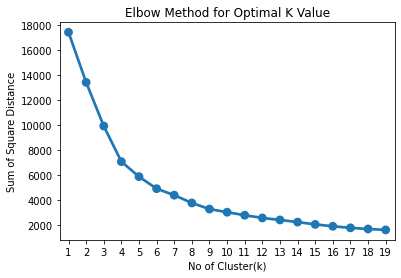

In [51]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}

for k in range(1,20):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=500)
    km = km.fit(RFMScores_scaled)
    sum_of_sq_dist[k] = km.inertia_
    
sns.pointplot(x= list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel("No of Cluster(k)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method for Optimal K Value")
plt.show()

In [52]:
kmeans_cluster = KMeans(n_clusters=5, init='k-means++', max_iter=500)
kmeans_cluster.fit(RFMScores_scaled)

KMeans(max_iter=500, n_clusters=5)

In [53]:
RFMScores['Cluster'] = kmeans_cluster.labels_
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
0,2.0,4,182,553704.0,1,1,1,111,3,Platinum,0
1,3.0,77,27,257404.0,4,3,1,431,8,Gold,0
2,4.0,20,72,176613.0,3,2,2,322,7,Diamond,0
3,5.0,18,16,41976.0,2,4,3,243,9,Gold,0
4,6.0,9,84,151822.0,1,2,2,122,5,Diamond,0


In [54]:
RFMScores.to_csv('new_cluster_data.csv')